# Load Data from google drive

In [1]:
!gdown --id 1vEIbcQQCeg5XlE7NAmDRXzUCu3fssZOe

Downloading...
From: https://drive.google.com/uc?id=1vEIbcQQCeg5XlE7NAmDRXzUCu3fssZOe
To: /content/Language Detection.csv
100% 1.91M/1.91M [00:00<00:00, 8.97MB/s]


# libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.arlstem import ARLSTem
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")
spacy.cli.download("fr_core_news_sm")
spacy.cli.download("es_core_news_sm")
spacy.cli.download("it_core_news_sm")
spacy.cli.download("nl_core_news_sm")
spacy.cli.download("de_core_news_sm")
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('nl_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [13]:
data = pd.read_csv("Language Detection.csv")
data.head(20)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [14]:
data.shape

(10337, 2)

In [15]:
data = data.sample(frac = 1)
data.head(20)

,Text,Language
6628,Со своей единственной дочерью Нарциса Марион б...,Russian
4425,dus vandaag gaan we 10 nieuwe slimme woorden l...,Dutch
4277,Voor Wikipedia is een apart programma ontworpen.,Dutch
7603,voglio continuare non sono stanco non è quando...,Italian
8673,fras nummer ett detta är ett annat sätt att fr...,Sweedish
8173,öneriler.,Turkish
4035,si vous êtes au milieu de quelque chose chez q...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,"Kanada Parlamentosu, Vikipedi'nin aynı cinste ...",Turkish
6632,У меня вся эта грязь на моих прекрасных пальчи...,Russian


# explore data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10337 entries, 6628 to 3577
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 242.3+ KB


In [17]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Data Visualization

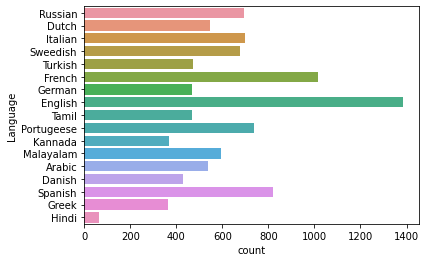

In [18]:
sns.countplot(y="Language", data=data)

# data preprocessing

#### remove punctuation

In [19]:
def remove_punctuation(text):
    data_list = [i for i in text if i not in string.punctuation]
    data="".join(data_list)
    return data

data['Text']= data['Text'].apply(lambda x:remove_punctuation(x))
data.head(20)

,Text,Language
6628,Со своей единственной дочерью Нарциса Марион б...,Russian
4425,dus vandaag gaan we 10 nieuwe slimme woorden l...,Dutch
4277,Voor Wikipedia is een apart programma ontworpen,Dutch
7603,voglio continuare non sono stanco non è quando...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si vous êtes au milieu de quelque chose chez q...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,Kanada Parlamentosu Vikipedinin aynı cinste in...,Turkish
6632,У меня вся эта грязь на моих прекрасных пальчи...,Russian


#### remove numbers from text

In [20]:
data['Text'] = data['Text'].str.replace('\d+', '')
data.head(20)

,Text,Language
6628,Со своей единственной дочерью Нарциса Марион б...,Russian
4425,dus vandaag gaan we nieuwe slimme woorden ler...,Dutch
4277,Voor Wikipedia is een apart programma ontworpen,Dutch
7603,voglio continuare non sono stanco non è quando...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si vous êtes au milieu de quelque chose chez q...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,Kanada Parlamentosu Vikipedinin aynı cinste in...,Turkish
6632,У меня вся эта грязь на моих прекрасных пальчи...,Russian


#### remove english letter

In [21]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text

for index in data.index:
    if data.loc[index,'Language']=='Russian' or data.loc[index,'Language']=='Malyalam' or data.loc[index,'Language']=='Hindi' or data.loc[index,'Language']=='Kannada' or data.loc[index,'Language']=='Tamil' or data.loc[index,'Language']=='Arabic':
        data.loc[index,'Text'] = removeEnglishLetters(data.loc[index,'Text'])

data.head(20)

,Text,Language
6628,Со своей единственной дочерью Нарциса Марион б...,Russian
4425,dus vandaag gaan we nieuwe slimme woorden ler...,Dutch
4277,Voor Wikipedia is een apart programma ontworpen,Dutch
7603,voglio continuare non sono stanco non è quando...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si vous êtes au milieu de quelque chose chez q...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,Kanada Parlamentosu Vikipedinin aynı cinste in...,Turkish
6632,У меня вся эта грязь на моих прекрасных пальчи...,Russian


#### lower case

In [22]:
data['Text'] = data['Text'].apply(lambda x: x.lower())
data.head(20)

,Text,Language
6628,со своей единственной дочерью нарциса марион б...,Russian
4425,dus vandaag gaan we nieuwe slimme woorden ler...,Dutch
4277,voor wikipedia is een apart programma ontworpen,Dutch
7603,voglio continuare non sono stanco non è quando...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si vous êtes au milieu de quelque chose chez q...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,kanada parlamentosu vikipedinin aynı cinste in...,Turkish
6632,у меня вся эта грязь на моих прекрасных пальчи...,Russian


#### Remove whitespaces

In [ ]:
def remove_whitespace(text):
    return  " ".join(text.split())

data['Text'] = data['Text'].apply(lambda x: remove_whitespace(x))

#### stop words

In [33]:
english_stop_words = stopwords.words('english')
arabic_stop_words = stopwords.words('arabic')
french_stop_words = stopwords.words('french')
spanish_stop_words = stopwords.words('spanish')
italian_stop_words = stopwords.words('italian')
russian_stop_words = stopwords.words('russian')
dutch_stop_words = stopwords.words('dutch')
german_stop_words = stopwords.words('german')
danish_stop_words = stopwords.words('danish')
Turkish_stop_words = stopwords.words('turkish')
Greek_stop_words = stopwords.words('greek')

def remove_stop_words(sentence, lang):
    token_words = nltk.word_tokenize(sentence)
    filtered_sentence = [w for w in token_words if w not in lang]
    return " ".join(filtered_sentence)

for index in data.index:
    if data.loc[index,'Language']=='English':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], english_stop_words)
    elif data.loc[index,'Language']=='Arabic':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], arabic_stop_words)
    elif data.loc[index,'Language']=='French':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], french_stop_words)
    elif data.loc[index,'Language']=='Spanish':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], spanish_stop_words)
    elif data.loc[index,'Language']=='Italian':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], italian_stop_words)
    elif data.loc[index,'Language']=='Russian':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], russian_stop_words)
    elif data.loc[index,'Language']=='Dutch':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], dutch_stop_words)
    elif data.loc[index,'Language']=='German':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], german_stop_words)
    elif data.loc[index,'Language']=='Danish':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], danish_stop_words)
    elif data.loc[index,'Language']=='Turkish':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], Turkish_stop_words)
    elif data.loc[index,'Language']=='Greek':
        data.loc[index,'Text'] = remove_stop_words(data.loc[index,'Text'], Greek_stop_words)

data.head(20)

,Text,Language
6628,своей единственной дочерью нарциса марион чрез...,Russian
4425,vandaag gaan we nieuwe slimme woorden leren be...,Dutch
4277,wikipedia apart programma ontworpen,Dutch
7603,voglio continuare stanco quando qualcuno chied...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si milieu quelque chose chez quelquun demande ...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,kanada parlamentosu vikipedinin aynı cinste in...,Turkish
6632,вся эта грязь моих прекрасных пальчиках хуже п...,Russian


#### stemming

In [34]:
stemmerEnglish = SnowballStemmer("english")
stemmerArabic = ARLSTem()
stemmerFrench = SnowballStemmer("french")
stemmerSpanish = SnowballStemmer("spanish")
stemmerItalian = SnowballStemmer("italian")
stemmerRussian = SnowballStemmer("russian")
stemmerDutch = SnowballStemmer("dutch")
stemmerGerman = SnowballStemmer("german")
stemmerDanish = SnowballStemmer("danish")

def stemSentence(sentence, porter):
    token_words = nltk.word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for index in data.index:
    if data.loc[index,'Language']=='English':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerEnglish)
    elif data.loc[index,'Language']=='Arabic':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerArabic)
    elif data.loc[index,'Language']=='French':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerFrench)
    elif data.loc[index,'Language']=='Spanish':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerSpanish)
    elif data.loc[index,'Language']=='Italian':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerItalian)
    elif data.loc[index,'Language']=='Russian':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerRussian)
    elif data.loc[index,'Language']=='Dutch':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerDutch)
    elif data.loc[index,'Language']=='German':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerGerman)
    elif data.loc[index,'Language']=='Danish':
        data.loc[index,'Text'] = stemSentence(data.loc[index,'Text'], stemmerDanish)


data.head(20)

,Text,Language
6628,сво единствен дочер нарцис марион чрезвычайн с...,Russian
4425,vandag gan we nieuw slimm woord ler betekenis ...,Dutch
4277,wikipedia apart programma ontworp,Dutch
7603,vogl continu stanc quand qualcun chied sicur a...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si milieu quelqu chos chez quelquun demand que...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,kanada parlamentosu vikipedinin aynı cinste in...,Turkish
6632,вся эт гряз мо прекрасн пальчик хуж попадет мо...,Russian


#### lemmatization

In [35]:
nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("fr_core_news_sm")
nlp_es = spacy.load("es_core_news_sm")
nlp_it = spacy.load("it_core_news_sm")
nlp_du = spacy.load("nl_core_news_sm")
nlp_gr = spacy.load("de_core_news_sm")

def lemmatizationSentence(sentence, nlp):
    doc = nlp(sentence)
    lemma_sentence=[]
    for token in doc:
        lemma_sentence.append(token.lemma_)
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

for index in data.index:
    if data.loc[index,'Language']=='English':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_en)
    elif data.loc[index,'Language']=='French':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_fr)
    elif data.loc[index,'Language']=='Spanish':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_es)
    elif data.loc[index,'Language']=='Italian':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_it)
    elif data.loc[index,'Language']=='Dutch':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_du)
    elif data.loc[index,'Language']=='German':
        data.loc[index,'Text'] = lemmatizationSentence(data.loc[index,'Text'], nlp_gr)

data.head(20)

,Text,Language
6628,сво единствен дочер нарцис марион чрезвычайн с...,Russian
4425,vandag gan we nieuw slimm woord ler betekenis ...,Dutch
4277,wikipedia apart programma ontworp,Dutch
7603,vogl continu stanc quand qualcun chied sicur a...,Italian
8673,fras nummer ett detta är ett annat sätt att fråga,Sweedish
8173,öneriler,Turkish
4035,si milieu quelqu chos chez quelquun demand que...,French
8728,saker händer bli inte upprörd om du inte har n...,Sweedish
7902,kanada parlamentosu vikipedinin aynı cinste in...,Turkish
6632,вся эт гряз мо прекрасн пальчик хуж попадет мо...,Russian


#### encoding data to accepted in model

In [23]:
le = LabelEncoder()
cv = CountVectorizer()

X = data['Text']
y = data["Language"]
y = le.fit_transform(y)
data_list = []
for i in X:
    data_list.append(i)
X = cv.fit_transform(data_list).toarray()

#### split data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# model MultinomialNB

In [25]:
model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
ac = accuracy_score(y_test, y_pred_NB)
cm = confusion_matrix(y_test, y_pred_NB)
print("Accuracy is :",ac)

Accuracy is : 0.973404255319149


Text(33.0, 0.5, 'Truth')

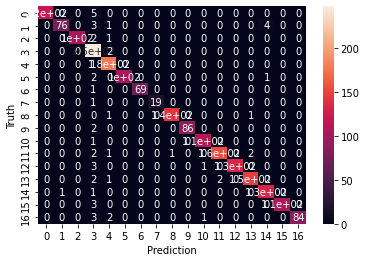

In [26]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Linear Support Vector Machine

In [27]:
model_sv = SGDClassifier(max_iter=1000, tol=0.01)
model_sv.fit(x_train,y_train)
y_pred_sv = model_sv.predict(x_test)
ac = accuracy_score(y_test, y_pred_sv)
cm = confusion_matrix(y_test, y_pred_sv)
print("Accuracy is :",ac)

Accuracy is : 0.8558994197292069


Text(33.0, 0.5, 'Truth')

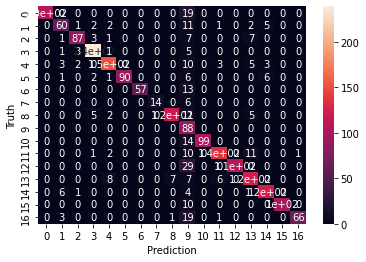

In [28]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Random Forest

In [29]:
model_RF = RandomForestClassifier(n_estimators = 100) 
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)
ac = accuracy_score(y_test, y_pred_RF)
cm = confusion_matrix(y_test, y_pred_RF)
print("Accuracy is :",ac)

Accuracy is : 0.9124758220502901


Text(33.0, 0.5, 'Truth')

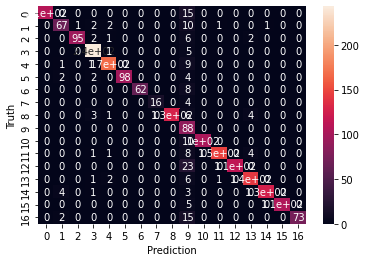

In [30]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

# test prediction

In [31]:
def predict(text, model):
     x = cv.transform([text]).toarray()
     lang = model.predict(x)
     lang = le.inverse_transform(lang)
     print("The langauge is in",lang[0])

In [32]:
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals", model_NB)
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات", model_NB)
predict('Kernpunkt sind neue Quarantäne-Regeln. Denn in Kürze wird in Deutschland die ansteckendere Omikron-Variante des Coronavirus dominieren, wie Experten fürchten, und dann könnten Polizei oder Feuerwehr, Kliniken oder Nahverkehr in schlimme Personalengpässe geraten. Deshalb hat Bundesgesundheitsminister Karl Lauterbach (SPD) am Mittwoch einen Vorschlag vorgelegt, der kürzere Quarantänezeiten vorsieht und der weitgehend übernommen worden ist.', model_NB)
predict('È morto Sidney Poitier, fu il primo attore afroamericano a vincere  della figlia di una coppia progressista (Katherine Hepburn e Spencer Tracy) con un medico nero e di molti altri film che hanno spianato la strada del successo a Hollywood ad attori e attrici afroamericani.', model_NB)
predict('LA QUESTION. «Et si on arrêtait tout simplement de tester ?!». La question, posée le 3 janvier par le docteur Gérald Kierzek, directeur médical de Doctissimo, a fait petite bombe sur Twitter. Alors que les contaminations explosent, que les hôpitaux tirent la sonnette sanitaire est de retour dans les territoires doutre-mer, la suggestion a de quoi déconcerter. «En pleine période épidémique avec un variant bénin, ça se discute sérieusement !», a insisté le médecin urgentiste et chroniqueur santé, qui a étayé ses propos le jour suivant sur le plateau du Figaro Live . «On a une épidémie qui a changé de visage. Le variant Omicron n’est plus dangereux, il amène très peu à, provoque très peu de formes graves». Il faut donc sortir du «calcul épidémiologique quotidien» qui alimente les «alarmistes», et qui engendre, estime-t-il, «un effet de panique».', model_NB)

The langauge is in English
The langauge is in Arabic
The langauge is in German
The langauge is in Italian
The langauge is in French
